importing librarays

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

select random points

In [12]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids


centroid function

In [13]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

centroid maker

In [14]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

k means function

In [15]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

importing data

In [16]:
data = loadmat('.\\ex7data2.mat')

initial centroids

In [17]:
X = data['X']
initial_centroids =  init_centroids(X, 3)
print(initial_centroids )

[[5.33533999 3.03928694]
 [6.99198434 2.98706729]
 [0.37963437 5.26194729]]


classify points

In [18]:
idx = find_closest_centroids(X, initial_centroids)

calculate new centroid

In [19]:
c = compute_centroids(X, idx, 3)
print(c)

[[3.97672903 1.87788918]
 [6.75348625 2.96344945]
 [1.81298313 4.81602148]]


apply k-means 

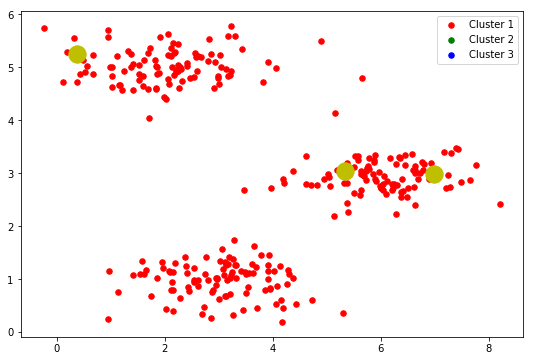

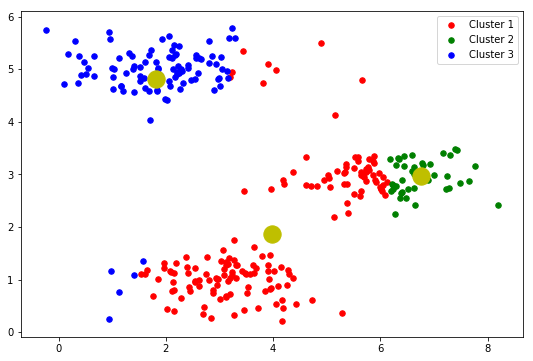

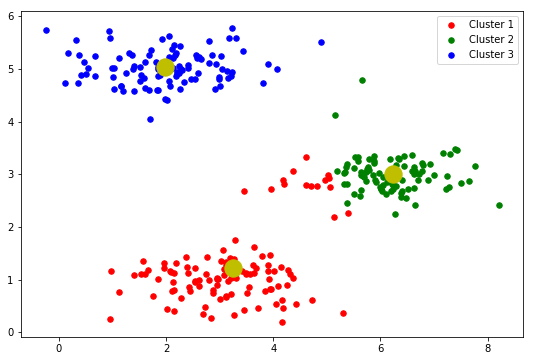

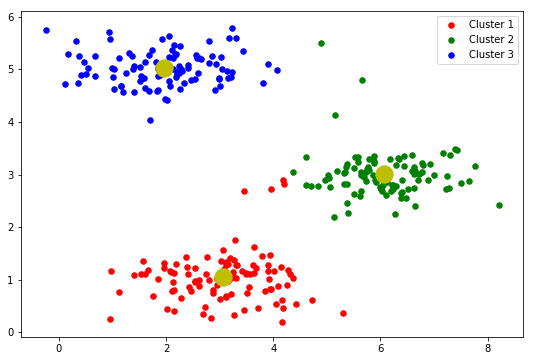

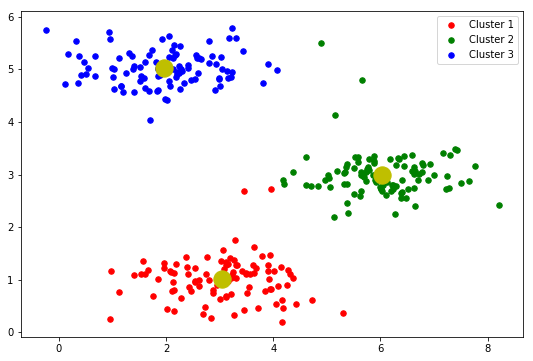

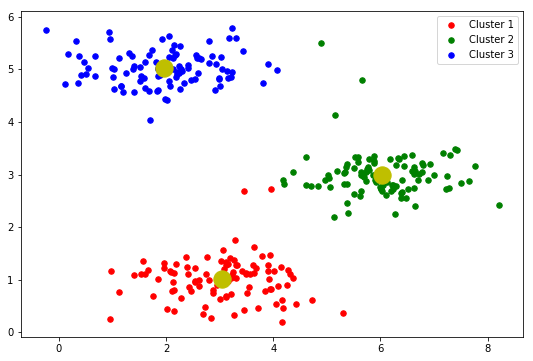

In [20]:
for x in range(6):

    idx, centroids = run_k_means(X, initial_centroids, x)
    
    # draw it
    cluster1 = X[np.where(idx == 0)[0],:]
    cluster2 = X[np.where(idx == 1)[0],:]
    cluster3 = X[np.where(idx == 2)[0],:]
    
    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
    ax.scatter(centroids[0,0],centroids[0,1],s=300, color='y')
    
    ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
    ax.scatter(centroids[1,0],centroids[1,1],s=300, color='y')
    
    ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
    ax.scatter(centroids[2,0],centroids[2,1],s=300, color='y')
    
    ax.legend()